In [1]:
import sklearn
print(sklearn.__version__)

0.24.1


In [ ]:
분류, 모델선택, 회귀, 클러스터링, 전처리 등등이 모듈로 존재하듯 필요에따라서 모듈단위로 가져온다.

In [2]:
from sklearn.datasets import load_iris #데이부분의 데이터는 데이터셋에 있다.

In [3]:
import numpy as np
import pandas as pd

In [6]:
iris_dataset = load_iris()

In [7]:
type(iris_dataset) #번치는 딕셔너리와 유사하다.

sklearn.utils.Bunch

In [9]:
iris_dataset.keys() # 이렇게 키값과 벨류가 있는 번치형태이다.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

* data : 꽃입(petal)의 길이와 폭, 꽃바침(sepal)의 길이와 폭을 수치 값으로 가지고 있는 numpy 배열
* target : 붓꽃의 품종
* target_names : target의 이름
* feature_names : 특성의 이름
* DESCR : 데이터 세트에 대한 설명과 각 특성의 설명

In [13]:
print(iris_dataset['DESCR']) #정렬을 위한 print

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris_dataset['target'] #각각 setosa, versicolor virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
iris_dataset['target'].shape

(150,)

In [16]:
iris_dataset['feature_names'] #길이, 폭, 길이, 폭

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
iris_dataset['data'].shape #150개의 붓꽃데이터가 있다. 품종은 3개로 나뉜다. 데이터는 넘파이 형태이기에 바꾸는 것이 좋다.

(150, 4)

In [19]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [25]:
iris_df = pd.DataFrame(data=iris_dataset['data'], columns = iris_dataset['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
iris_df['label'] = iris_dataset['target']

In [27]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
iris_df[iris_df.label == 0] #각 품종마다 50개씩 데이터를 가지고 있음을 확인.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [31]:
from sklearn.model_selection import train_test_split

In [34]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [35]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=42) #25%를 빼내서 테스트 세트로 나누어줌  #리스트 넘파이배열, scipy-sparse 판다스 등등에 대해 분리를 해준다.
#random_state가 없더라도 알아서 섞고 나누어 내보낸다.

In [78]:
X_train.shape

(112, 4)

In [ ]:
df.plot(kind=scatter, x=,y=)

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

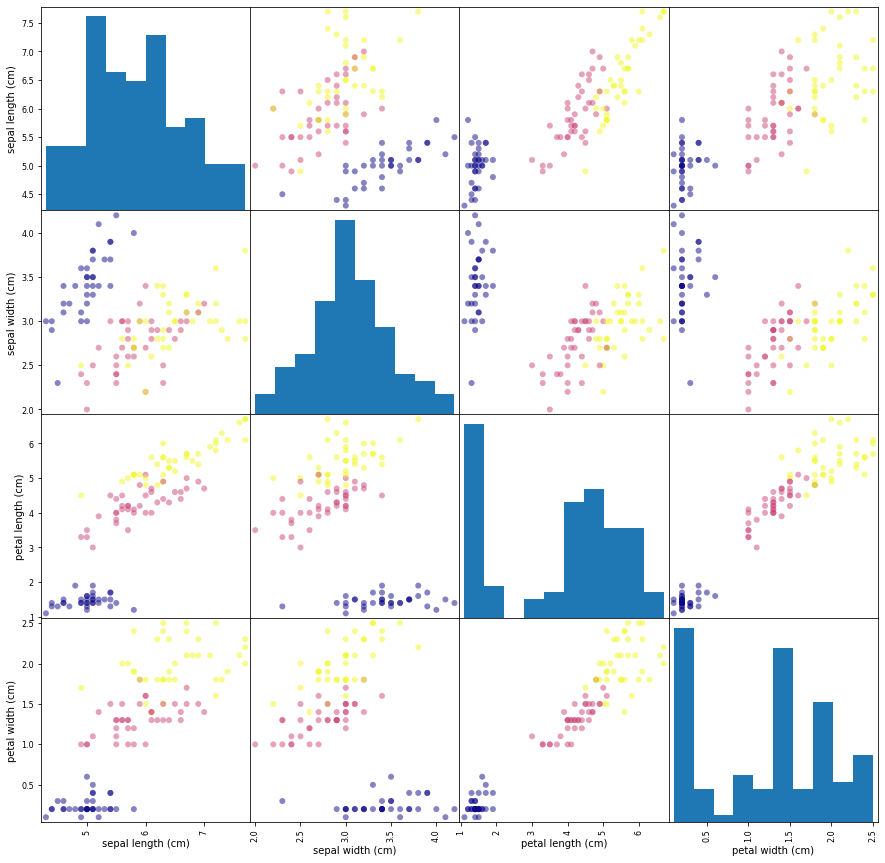

In [69]:
iris_train_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
pd.plotting.scatter_matrix(iris_train_df, c = y_train, marker='o', cmap='plasma', figsize=(15, 15)) #0, 1, 2값의 품종에 따라서 색을 나눈다. 
#corr처럼 컬럼이자 인덱스로 만든다음 서로에 대한 조합을 만들어서 그림을 그린다. 그렇기에 따로 x와 y가 필요없다.

In [ ]:
#자기자신과 자기 자신은 빈도수만 barplot으로 표시함. #보라색이 세토사 세토사는 확실히 다르다.

In [38]:
X_train.shape

(112, 4)

In [79]:
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

In [40]:
X_test.shape

(38, 4)

In [41]:
y_train.shape

(112,)

In [42]:
y_test.shape

(38,)

In [43]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNeighborsClassifier() #해당 분류기는 유사점을 비교해서 유사한 경우의 값으로 예측한다. 나랑 비슷한 사람이 이러면 나도 이럴 것이다를 전제로한
# 모델이다.

KNeighborsClassifier()

In [46]:
knn = KNeighborsClassifier(n_neighbors=1) #Regressor 수치를 예측한다 classifier은 분류한다. #사례기반 학습이다. 유사성만 가짐 모델이 없다시피 한다.

In [48]:
knn.fit(X_train, y_train) #fit으로 모델에 맞추기.

KNeighborsClassifier(n_neighbors=1)

In [49]:
#학습을 했으니 테스트를 해야함. 일단 정답데이터 없이 첫 예측만 본다.
y_pred = knn.predict(X_test)

In [50]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [51]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [52]:
y_pred == y_test #이렇게 패키지가 있기에 쉽게 할 수 있다.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
# 정확도(1)

In [53]:
np.mean(y_pred == y_test) #1.0에 가까울수록 정확도가 높다.

1.0

In [ ]:
5.1, 3.5, 1.4, 0.2

In [80]:
X_new = np.array([[5.9, 3. , 1.1, 1.8]])

In [81]:
knn.predict(X_new)

array([0])

In [ ]:
x_train = pd.DataFrame(iris_dataset['data'], columns = iris_dataset['feature_names'])
y_train = pd.DataFrame(iris_dataset['target']) #array로 넣어야 문제가 안생긴다 지금은 데이터 프레임

In [ ]:
* 정확도 : 전체 label 중에 맞은 예측의 개수

In [ ]:
# 정확도 (2)

In [87]:
knn.score(X_test, y_test) #해당 X테스로 예측한 것을 기반으로 정확도를 비교

1.0

In [ ]:
# 정확도 (3)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
학습 : fit() 예측 : predict()

* K-최근접 이웃 : 근처값을 받아온다.
* 선형회귀 : 비레하는 값을 보아서 이게 이러면 저건 저럴 것이다 라는 느낌 경향성을 보고 찾는 듯*
* 로지스틱 회귀 : 기본은 선형회귀인데 함수를 한번 더 거치는 동안 분류가 되어서 이거냐 저거냐를 찾아서 확률값으로 나타낸다.
* 서포트 벡터 머신 : 수학적인 모델로 딥러닝 이전에 주로 사용된 수학적으로 탄탄한 머신러닝 알고리즘이다. 다목적이라서 분류와 회귀 모두 가능하다. 후에 딥러닝에 밀렸다. 
* 결정 트리 와 랜덤 포레스트 : 트리의 노드로 의사결정을 통해서 분류, 회귀를 한다., 랜덤포레스트는 앙상블 모델로 단일의 약한 여러가지를 합친 것이 앙상블인데 해당 모델은 그중에서 노드만을 합쳐놓아 강력한 것이 특징이다.
* 신경망 : 인간의 뉴런을 흉내내어 만든 모델 딥러닝으로 비교적 최근모델

# 비지도 학습

* 비지도학습은 레이블(정답)이 없어서 직접 확인하기 전까지올바른지 평가하기 어렵다. 지도학습과 정확도를 찾는법이 다르다.
* 데이터를 이해하기 위한 탐색적 데이터 분석에도 사용된다.

## 군집

데이터들을 특징에 따라서 그룹으로 묶는 것이다. 블로그 방문자로 따지면 취미생활, 활동시간, 방문시간 이런 것으로 분리할 수 있다.

## 시각화

2D나 3D로 변환하여 도식화 구조를 한눈에 보다보면 예상치못한 패턴을 발견할 수 있다.

## 차원 축소
상관관계가 있는 특성들을 하나로 만든다. 
차의 주행거리 + 연식 -> 차의 마모 이런식으로 비례하는 특성을 모아서 새로운 특성을 만든다

## 이상치 탐색
평소의 값에 비해서 비이상적으로 튀는 값이 발견한다면 자동으로 제거할 수도 있다.
그 자체로도 판단하는 용도로도 쓰인다.

## 연관 규칙 학습
대량의 데이터에서 특성간의 흥미로운 관계를 찾음
바비큐 소스와 감자를 구매한 사람이 스테이크도 구매 하는 경향을 파악

규칙기반 학습의 한 종류로 사이킷런에서 제공하지 않는다.

# 준지도 학습

모든 값에 레이블이 있지는 않고 소수의 데이터에만 레이블이 있다.
해서 군집을 통해서 군집내부 데이터들의 레이블을 파악하여 속성을 부여하는 느낌이다.
가족사진의 구성원 군집에서 a집단이 1, 3, 5... 가 있지만 3이 아들이면 1과 5도 아들일 가능성이 크다는 것이다.

# 강화학습
매우 다른 종류의 알고리즘

주어진 환경에서 에이전트가 최대의 보상을 얻기위해 최상의 정책을 학습
알파고가 그 예이다.
보상을 얻을 확률이 높은 것들만 찾아나가는 것임.
최적의 해를 찾는다.

# 배치학습

가용한 데이터를 모두 사용한다. 24시간 혹은 1주일마다 학습 시간 자원 많이 소모

샘플 한개 또는 미니 배치라 부르는 작은 묶음 단위

# 온라인학습
컴퓨팅 자원이 제한된 경우에 적합

연속적으로 데이터를 받고 빠른 변화에 적응해야 하는 시스템에 적합

빠르고 빙요도 적게들어 데이터가 준비되는 대로 즉시 학습


컴퓨터 한대가 메인메모리에 들어갈 수 없는 아주 큰 데이터 셋을 학습할 때도 사용한다

# 사례 기반 학습

일반화 방법에따라서 사례 기반과 모델 기반으로 나눈다.

사례를 기억해서 이와 유사도 측정을 통해 새로운 데이터를 일반화

EX) 스팸메일에 가지고 있는 단어와 공통으로 가지고 있는 단어가 많으면 스팸으로 분류한다.해당 유사도 측정은 공통 단어의 수를 세는것!

세모 두개를 갖고있고 네모 하나를 가지고 있으면 세모에 비슷하다고 판단함 최근접 이웃과 다를 가능성이 있다 멀리보고 좁게보느냐의 차이

# 모델 기반 학습
샘플로 부터 일반화를 시켜서 함수를 만들어 포함되면 이쪽 군집 해당되지 않으면 저쪽 군집 이런 느낌으로 예측한다.

패턴을 통해서 분류하는 함수를 만드는 것이 중요하다

aX+ b = Y 값과 해당 함수의 그래프의 거리가 줄어드는 즉 비용함수의 값이 작아지는 모델 파라미터 (기울기와 절편)을 구해야 한다. 이를 찾는 과정을 훈련 또는 학습이라고 한다.

## 비용함수
* 좋은 모델을 고르기 위해서는?

측정 지표를 정해야 함
얼마나 좋은지를 측정하는 효용함수로 정하거나 반대로

In [ ]:
iris_train_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])